<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EA%B3%BC%EC%A0%81%ED%95%A9(Overfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):

    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0

    return results

'''
1. 과적합 될 모델과 비교하기 위해 기본 모델을
   마크다운 설명과 동일하게 생성합니다.
'''

def Basic(word_num):

    basic_model = tf.keras.Sequential([ tf.keras.layers.Dense(256, activation = 'relu', input_shape=(word_num,)), tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(1, activation= 'sigmoid')])

    return basic_model

'''
2. 기본 모델의 레이어 수와 노드 수를 자유롭게 늘려서
   과적합 될 모델을 생성합니다.
'''

def Overfitting(word_num):

    overfit_model = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation = 'relu', input_shape=(word_num,)), tf.keras.layers.Dense(512, activation = 'relu'), tf.keras.layers.Dense(512, activation = 'relu'), tf.keras.layers.Dense(512, activation = 'relu'),tf.keras.layers.Dense(512, activation = 'relu'), tf.keras.layers.Dense(1, activation= 'sigmoid')])

    return overfit_model

'''
3. 두 개의 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. basic_model와 overfit_model 함수를 이용해
           두 모델을 불러옵니다.

   Step02. 두 모델의 손실 함수, 최적화 알고리즘,
           평가 방법을 설정합니다.

   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 두 모델을 학습시킵니다.
           검증용 데이터도 설정해주세요.

           기본 모델은 'epochs'를 20,
           과적합 모델은 'epochs'를 300이상으로 설정합니다.
           'batch_size'는 두 모델 모두 500으로 설정합니다.

   Step05. 두 모델을 테스트하고
           binary crossentropy 값을 출력합니다.
'''

def main():

    word_num = 100
    data_num = 25000

    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.

    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)

    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    basic_model = Basic(word_num)    # 기본 모델입니다.
    overfit_model = Overfitting(word_num)  # 과적합시킬 모델입니다.

    basic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    overfit_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])

    basic_model.summary()
    overfit_model.summary()

    basic_history = basic_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    overfit_history = overfit_model.fit(train_data, train_labels, epochs=300, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores_basic = basic_model.evaluate(test_data, test_labels, verbose=0)
    scores_overfit = overfit_model.evaluate(test_data, test_labels, verbose=0)

    print('\nscores_basic: ', scores_basic[-1])
    print('scores_overfit: ', scores_overfit[-1])

    Visualize([('Basic', basic_history),('Overfitting', overfit_history)])

    return basic_history, overfit_history

if __name__ == "__main__":
    main()

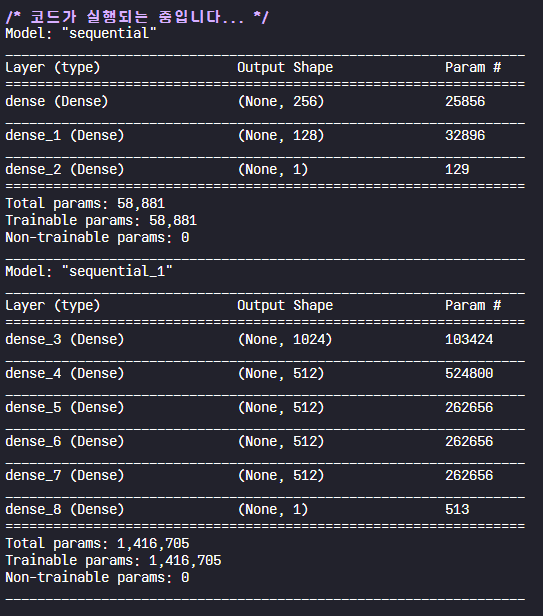

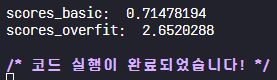

score는 loss를 사용해서 낮을수록 좋다. 베이직 모델이 더 좋은것을 확인할 수 있다.


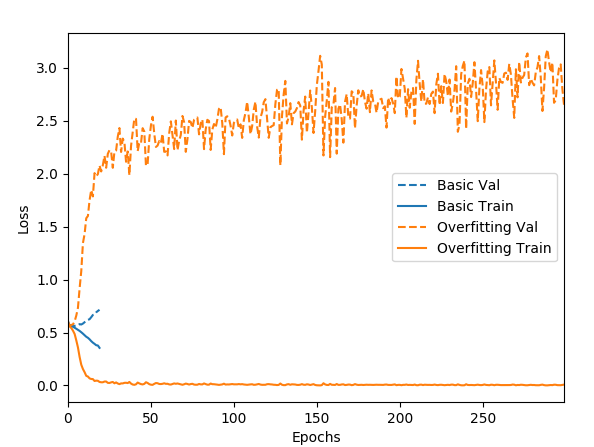